In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [2]:
with open('./NN_result/lt_df_NN_rank_122days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[-107:], ignore_index=True)

In [4]:
full_table

,target,next,rank,NN_rank
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34
...,...,...,...,...
4121435,e32ec082b86611e9acdeacde48001122,f5c28512b86611e9a8faacde48001122,9.00,41
4121436,cc291e9ab86c11e9a816acde48001122,7ea62294b86711e9af3cacde48001122,14.00,11
4121437,e3352666b86611e99668acde48001122,90fd70f0b86711e9bb20acde48001122,37.00,30
4121438,90fd70f0b86711e9bb20acde48001122,e3352666b86611e99668acde48001122,42.00,5


In [5]:
full_table.describe()

,rank,NN_rank
count,4121440.00,4121440.00
mean,20.60,21.07
std,24.43,22.96
min,1.00,1.00
25%,3.00,4.00
50%,10.00,12.00
75%,30.00,31.00
max,99.00,99.00


In [6]:
table_grby = full_table.groupby(['target', 'next'])
pd.DataFrame(table_grby.size())

0
target                           next                               
008f35cab86811e9af9cacde48001122 0710fdc6b86711e9ad8facde48001122  1
                                 e33059ccb86611e9949aacde48001122  1
008f3dccb86811e9b6c1acde48001122 baaf46eeb86711e9ae53acde48001122  3
                                 baaf4748b86711e99ebaacde48001122  3
008f3e76b86811e98317acde48001122 1e92191eb86a11e9bf5cacde48001122  1
...                                                               ..
fbd89552b86d11e9bb6cacde48001122 1776586eb86711e999d4acde48001122  2
fbd95d02b86d11e9b61facde48001122 b8b2a0f4b86c11e9931aacde48001122  1
fbd99254b86d11e98d74acde48001122 577857a8b86c11e9b0b1acde48001122  1
                                 78661a8cb86811e99421acde48001122  1
                                 e492f44cb86a11e9be3dacde48001122  2

[1595325 rows x 1 columns]

In [7]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [8]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [20]:
df_table

,target,next,occur,rank,NN_rank
0,008f35cab86811e9af9cacde48001122,0710fdc6b86711e9ad8facde48001122,1,50.00,5
1,008f35cab86811e9af9cacde48001122,e33059ccb86611e9949aacde48001122,1,27.00,8
2,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1
3,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1
4,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1
...,...,...,...,...,...
4121435,fbd95d02b86d11e9b61facde48001122,b8b2a0f4b86c11e9931aacde48001122,1,1.00,2
4121436,fbd99254b86d11e98d74acde48001122,577857a8b86c11e9b0b1acde48001122,1,6.00,39
4121437,fbd99254b86d11e98d74acde48001122,78661a8cb86811e99421acde48001122,1,2.00,25
4121438,fbd99254b86d11e98d74acde48001122,e492f44cb86a11e9be3dacde48001122,2,1.00,7


In [9]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
df_table

,target,next,occur,rank,NN_rank
0,008f35cab86811e9af9cacde48001122,0710fdc6b86711e9ad8facde48001122,1,50.00,5
1,008f35cab86811e9af9cacde48001122,e33059ccb86611e9949aacde48001122,1,27.00,8
2,008f3dccb86811e9b6c1acde48001122,baaf46eeb86711e9ae53acde48001122,3,2.00,1
3,008f3dccb86811e9b6c1acde48001122,baaf4748b86711e99ebaacde48001122,3,1.00,4
4,008f3e76b86811e98317acde48001122,1e92191eb86a11e9bf5cacde48001122,1,95.00,85
...,...,...,...,...,...
1595320,fbd89552b86d11e9bb6cacde48001122,1776586eb86711e999d4acde48001122,2,22.00,1
1595321,fbd95d02b86d11e9b61facde48001122,b8b2a0f4b86c11e9931aacde48001122,1,1.00,2
1595322,fbd99254b86d11e98d74acde48001122,577857a8b86c11e9b0b1acde48001122,1,6.00,39
1595323,fbd99254b86d11e98d74acde48001122,78661a8cb86811e99421acde48001122,1,2.00,25


In [10]:
df_table.describe()

,occur,rank,NN_rank
count,1595325.00,1595325.00,1595325.00
mean,2.58,26.52,26.91
std,8.41,26.70,25.19
min,1.00,1.00,1.00
25%,1.00,5.00,6.00
50%,1.00,16.00,18.00
75%,2.00,42.00,42.00
max,2246.00,99.00,99.00


In [11]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank
count,354.00,354.00
mean,9.98,9.22
std,11.39,7.82
min,1.00,1.00
25%,3.00,3.00
50%,7.75,7.53
75%,13.87,13.54
max,92.00,69.00


In [13]:
df_table.groupby('occur').mean().to_excel('result_-107days_v2.xlsx')

TypeError: 'AxesSubplot' object is not subscriptable

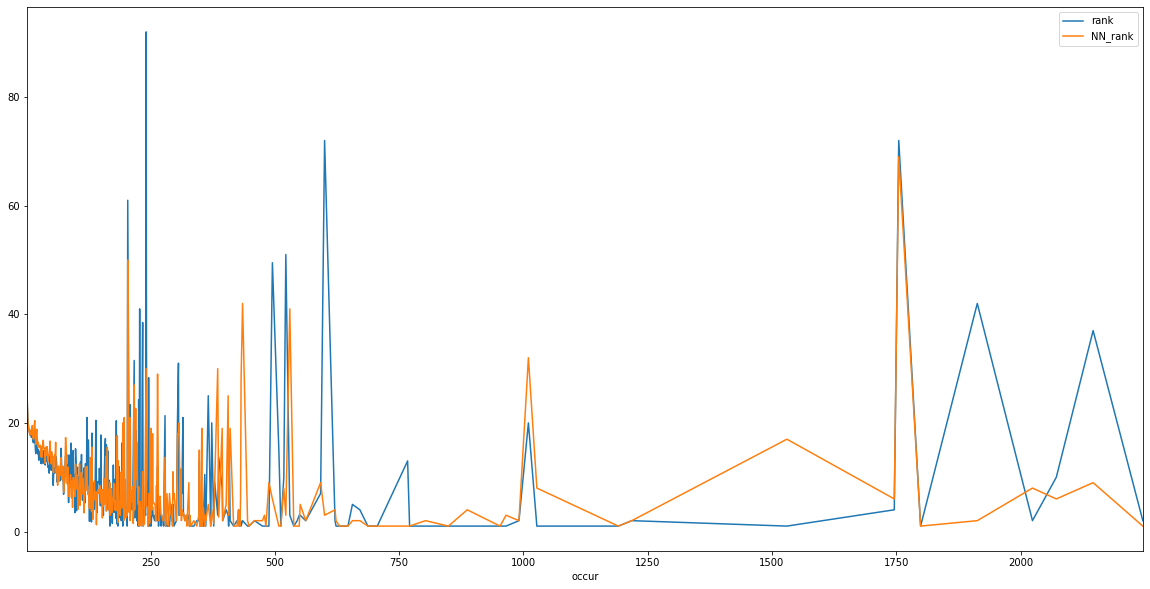

In [13]:
df_table.groupby('occur').mean().plot(figsize=(20,10))[:100]